In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv("ReidentificationTests.csv")

In [115]:
from Utils.constant import MODELS
from Utils.constant import PLACES

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x), string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)

    for probe_places in PLACES:
        for gallery_places in PLACES:
            if probe_places != gallery_places:
                print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
                for model in MODELS:
                    df_model = filterData(df,
                    'Identification_Model == "%s" and Probe_place == "%s" '
                    'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
                    for index in range(len(df_model)):
                        colum: pd.DataFrame = df.iloc[index]
                        label: str = model \
                            if model == MODELS[-1] \
                            else colum['Metric']
                        cmc = stringToLst(colum["Values"])
                        plt.plot(cmc, label = label)
                        plt.xlabel("Posiciones de la calificación")
                        plt.ylabel("Precisión")
                        plt.grid(True)
                        plt.legend(loc='lower right')
                        plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
                    plt.show()
                    print(model)
                    print(df_model[['Metric', 'mAPtop1', 'mAPtop5']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
[ ### Probe: Arucas - Gallery: Ayagaures  ###]
VGG-Face
       Metric   mAPtop1   mAPtop5
20     cosine  0.015748  0.015748
40  euclidean  0.013312  0.013312
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: ParqueSur  ###]
VGG-Face
       Metric   mAPtop1   mAPtop5
21     cosine  0.020407  0.021176
41  euclidean  0.008745  0.010449
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: PresaDeHornos  ###]
VGG-Face
       Metric   mAPtop1   mAPtop5
22     cosine  0.010491  0.010491
42  euclidean  0.009631  0.009631
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: Teror  ###]
VGG-Face
       Metric   mAPtop1   mAPtop5
23

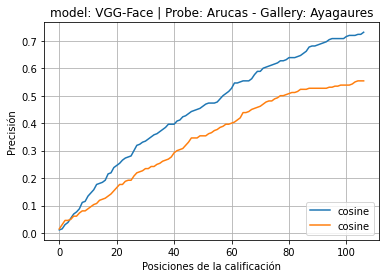

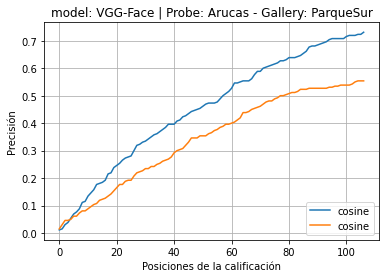

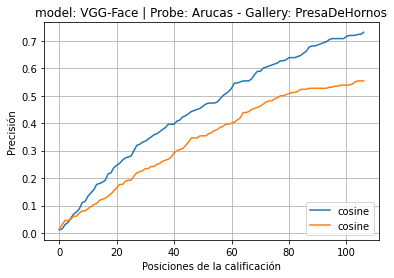

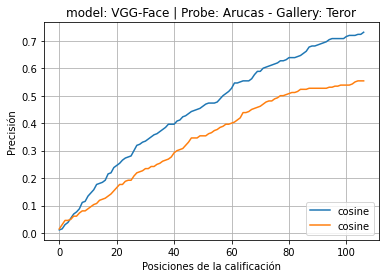

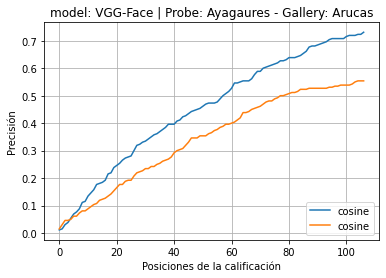

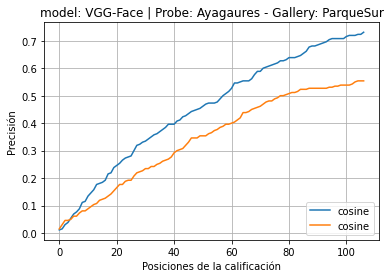

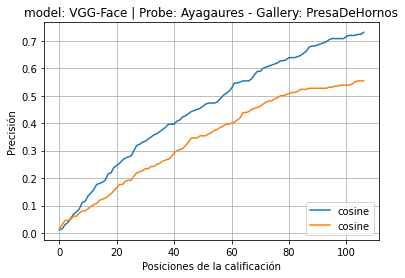

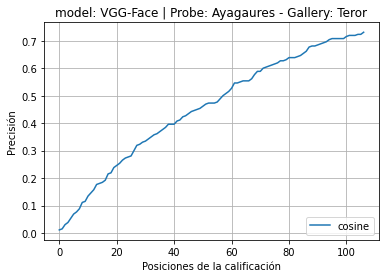

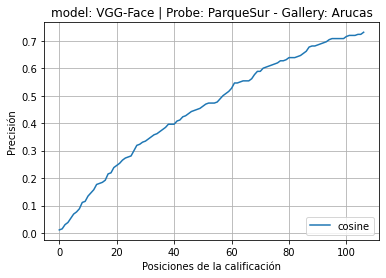

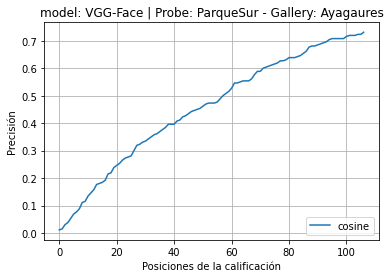

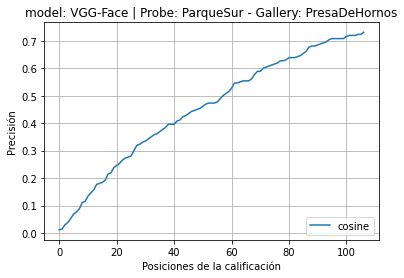

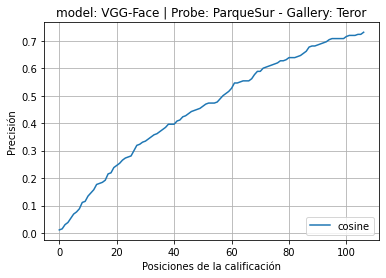

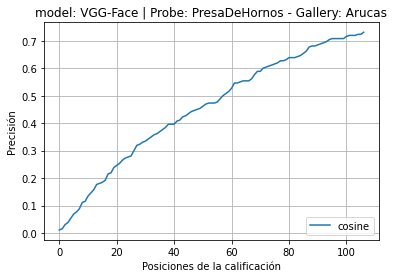

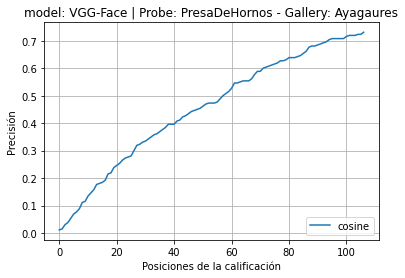

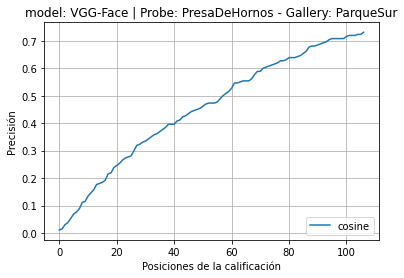

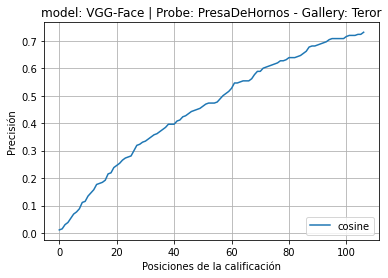

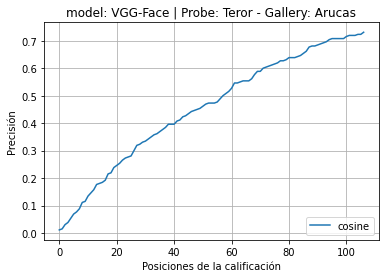

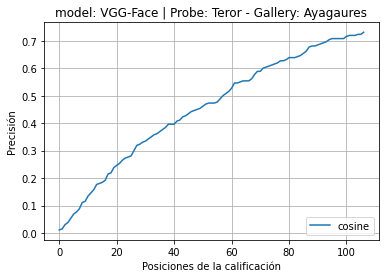

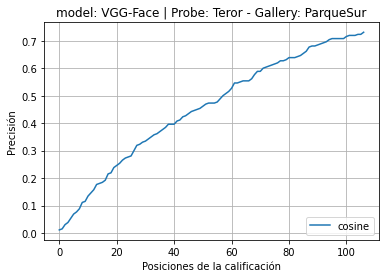

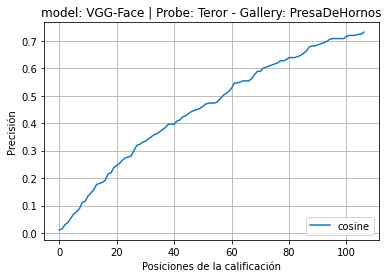

In [116]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace + recorte
[ ### Probe: Arucas - Gallery: Ayagaures  ###]
VGG-Face
   Metric  mAPtop1  mAPtop5
1  cosine    0.035    0.035
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: ParqueSur  ###]
VGG-Face
   Metric   mAPtop1   mAPtop5
2  cosine  0.057467  0.061467
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: PresaDeHornos  ###]
VGG-Face
   Metric  mAPtop1  mAPtop5
3  cosine   0.0025   0.0025
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: Teror  ###]
VGG-Face
   Metric   mAPtop1   mAPtop5
4  cosine  0.038667  0.038667
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Colum

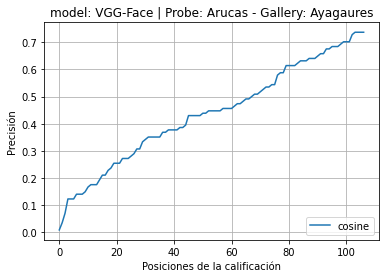

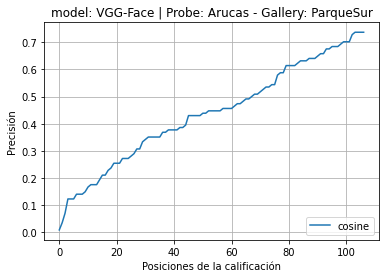

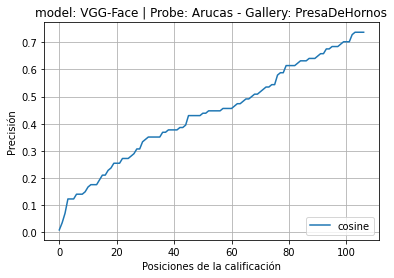

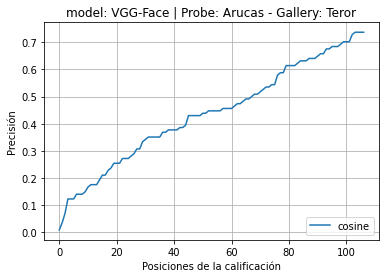

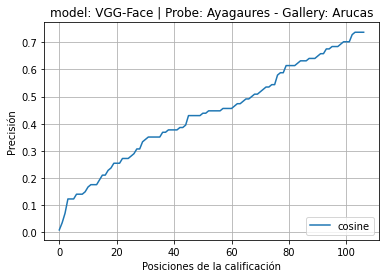

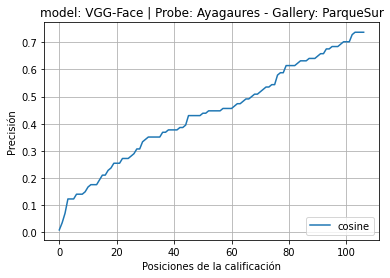

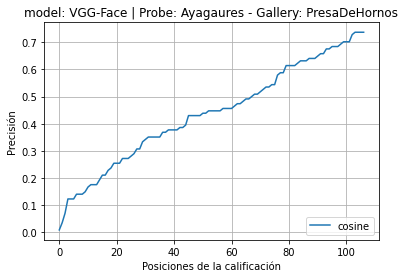

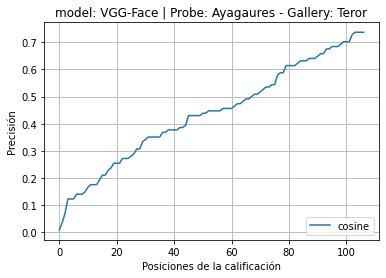

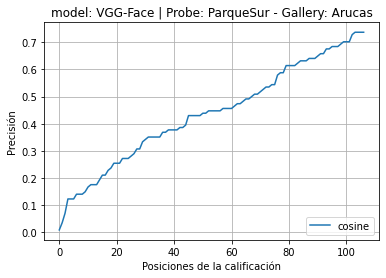

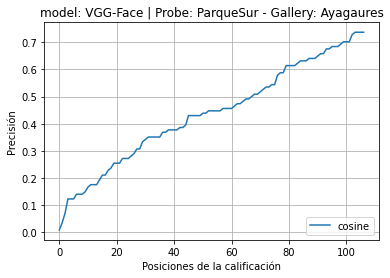

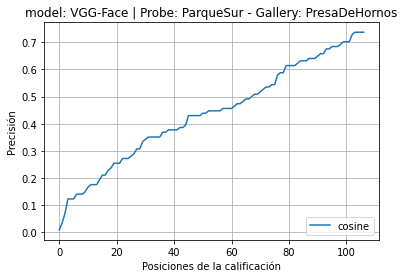

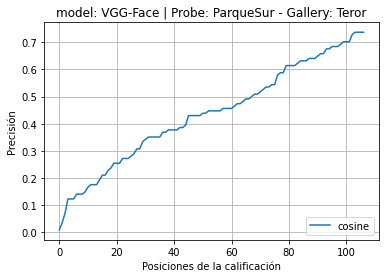

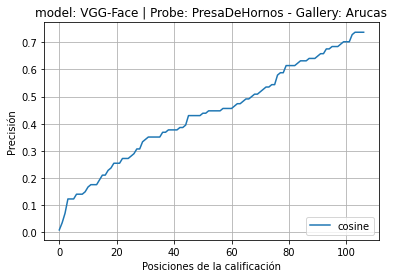

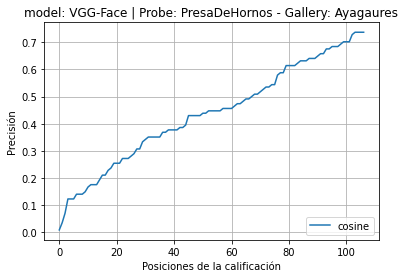

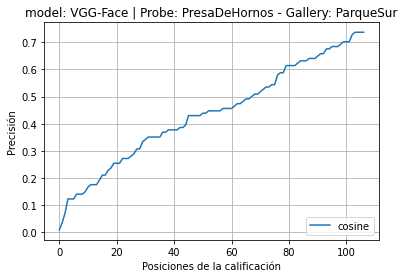

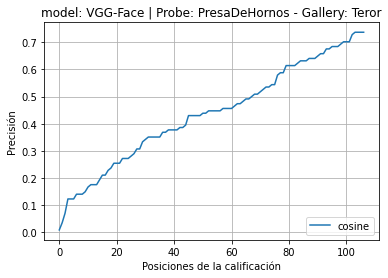

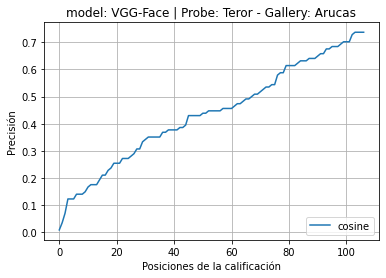

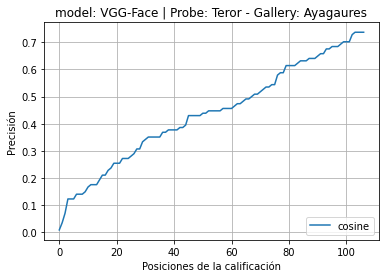

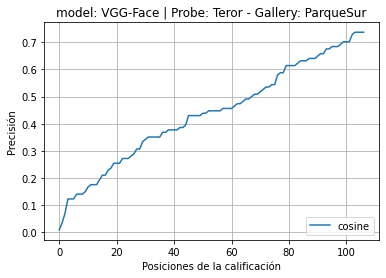

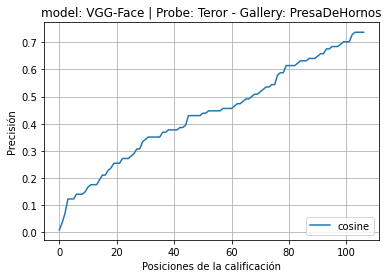

In [117]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

In [118]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose
[ ### Probe: Arucas - Gallery: Ayagaures  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: ParqueSur  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: PresaDeHornos  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: Teror  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
C

In [119]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

Img2pose + recorte de imagenes
[ ### Probe: Arucas - Gallery: Ayagaures  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: ParqueSur  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: PresaDeHornos  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
[ ### Probe: Arucas - Gallery: Teror  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Open

In [120]:
from sklearn.metrics import average_precision_score

def calculateAveragePrecision(dorsalList: list, query: int) -> tuple:
        averagePrecision = []
        count = 0
        print(dorsalList)
        for index, dorsal in enumerate(dorsalList):
            if dorsal == query:
                count += 1
                averagePrecision.append(count / (index + 1))
            else:
                averagePrecision.append(0)

        return averagePrecision[0], sum(averagePrecision)

dorsal = 1
dorsalList = [1,0,1,2,2,3,2,1,4,5,6,7]
countTP = 1 / dorsalList.count(dorsal)
res = calculateAveragePrecision(dorsalList[0:5], dorsal)
print(countTP * res[0])
print(countTP * res[1])


print(average_precision_score())

[1, 0, 1, 2, 2]
0.3333333333333333
0.5555555555555555


TypeError: average_precision_score() missing 2 required positional arguments: 'y_true' and 'y_score'